In [0]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [0]:
import tensorflow as tf #
import keras
from tensorflow.keras.callbacks import TensorBoard
import time
import numpy as np
import matplotlib.pyplot as plt
import cv2

Using TensorFlow backend.


In [0]:
mnist = tf.keras.datasets.mnist #28*28 image of handwritten of 0-9 
(x_train, y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
print("Training Data Shape is {}".format(x_train.shape))
print("Training Labels Shape is {}".format(y_train.shape))
print("Testing Data Shape is {}".format(x_test.shape))
print("Testing Labels Shape is {}".format(y_test.shape))

Training Data Shape is (60000, 28, 28)
Training Labels Shape is (60000,)
Testing Data Shape is (10000, 28, 28)
Testing Labels Shape is (10000,)


In [0]:
print("Sample Training Data is {}".format(x_train[0]))

Sample Training Data is [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 25

In [0]:
print("Sample Training label is {}".format(y_train[0:5]))

Sample Training label is [5 0 4 1 9]


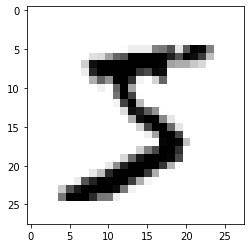

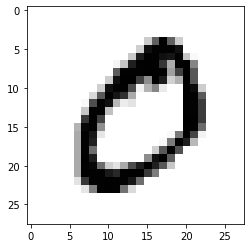

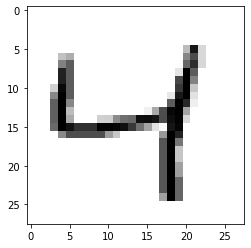

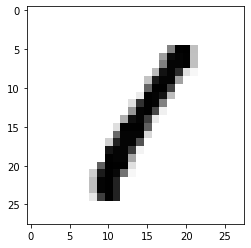

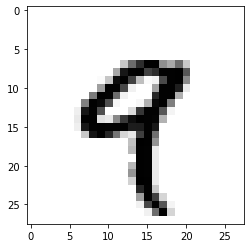

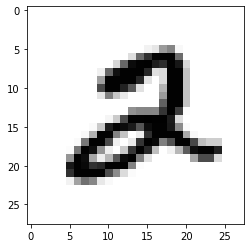

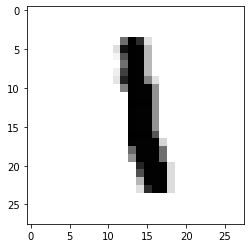

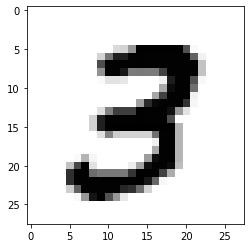

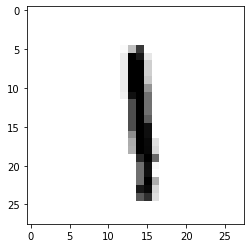

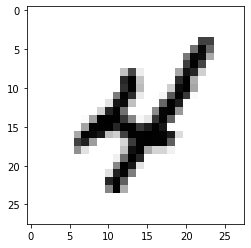

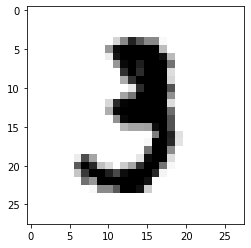

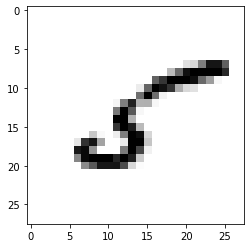

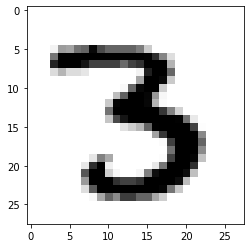

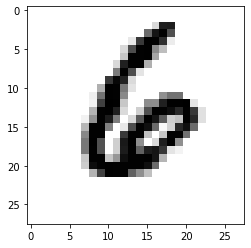

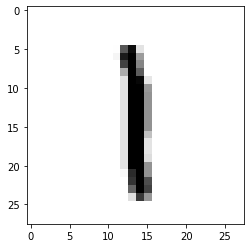

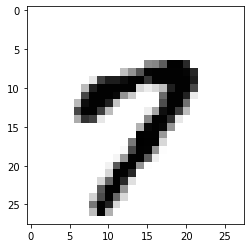

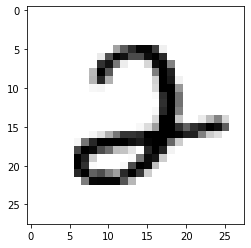

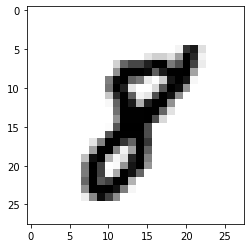

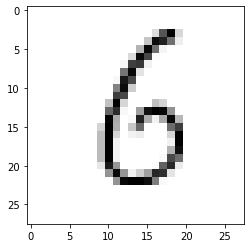

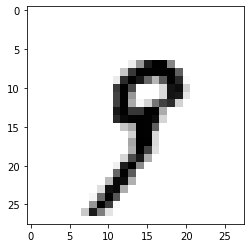

In [0]:
for i in range(0,20):
  plt.imshow(x_train[i], cmap = plt.cm.binary)
  plt.show()


In [0]:
x_train = tf.keras.utils.normalize(x_train, axis = 1) # 
x_test = tf.keras.utils.normalize(x_test,axis = 1)

In [0]:
print("Training Data after normalizing is {}".format(x_train[0]))
print("Testing  Data after normalizing is {}".format(x_test[0]))

Training Data after normalizing is [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.       

In [0]:
model = tf.keras.models.Sequential() 

model.add(tf.keras.layers.Flatten()) 

model.add(tf.keras.layers.Dense(500,activation=tf.nn.relu))

model.add(tf.keras.layers.Dense(200,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(100,activation=tf.nn.relu))

model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax)) # softmax for probability distribution

model.compile(optimizer = "adam" , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'] )

history = model.fit(x_train,y_train,epochs = 50 ,validation_data=(x_test,y_test) )

predictions = model.predict([x_test])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 9s 150us/sample - loss: 0.2218 - acc: 0.9326 - val_loss: 0.1277 - val_acc: 0.9620
Epoch 2/50
60000/60000 [==============================] - 8s 135us/sample - loss: 0.0960 - acc: 0.9705 - val_loss: 0.0924 - val_acc: 0.9719
Epoch 3/50
60000/60000 [==============================] - 8s 135us/sample - loss: 0.0661 - acc: 0.9797 - val_loss: 0.0863 - val_acc: 0.9746
Epoch 4/50
60000/60000 [==============================] - 8s 136us/sample - loss: 0.0514 - acc: 0.9845 - val_loss: 0.1002 - val_acc: 0.9754
Epoch 5/50
60000/60000 [==============================] - 8s 134us/sample - loss: 0.0404 - acc: 0.9874 - val_loss: 0.0896 - val_acc: 0.9748
Epoch 6/50
60000/60000 [==============================] - 8s 136us/sample - loss: 0.0343 - acc: 0.9894 - val_loss: 0.0997 - val_acc: 0.9760
Epoch 7/50
60000/60000 [=====

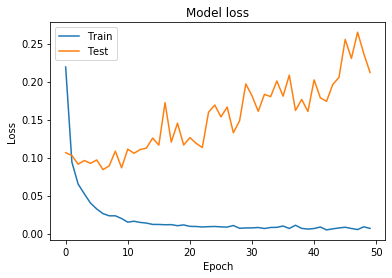

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

In [0]:
print("Probability for each digit ( 0,1,2,3,4,5,6,7,8,9)")
predictions[5]

Probability for each digit ( 0,1,2,3,4,5,6,7,8,9)


array([1.4205197e-26, 1.0000000e+00, 2.9302147e-25, 1.8623245e-24,
       2.7440948e-18, 4.1478151e-28, 4.6234345e-33, 4.0458558e-16,
       7.8676258e-21, 5.0511457e-27], dtype=float32)

In [0]:
print(np.argmax(predictions[5]))

1


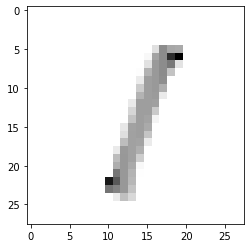

In [0]:
plt.imshow(x_test[5], cmap = plt.cm.binary)
plt.show()

In [0]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 44us/sample - loss: 0.2120 - acc: 0.9814
0.2119790635254636 0.9814


In [0]:
predictions = model.predict([x_test])

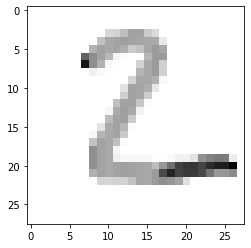

In [0]:
plt.imshow(x_test[1], cmap = plt.cm.binary)
plt.show()

In [0]:
print(np.argmax(predictions[1]))

2


**Open cv**

In [0]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


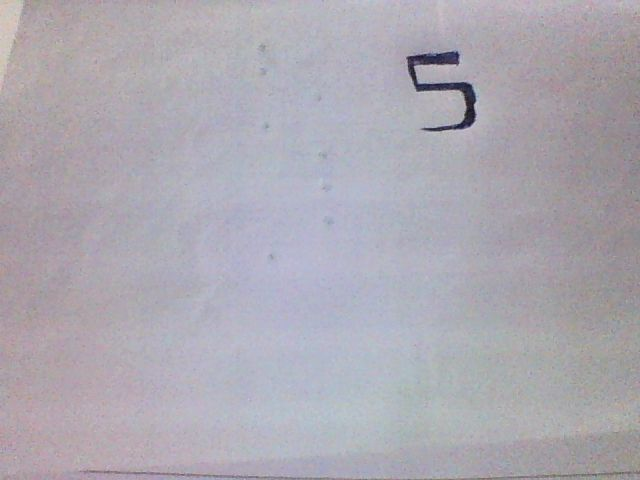

In [0]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

307200


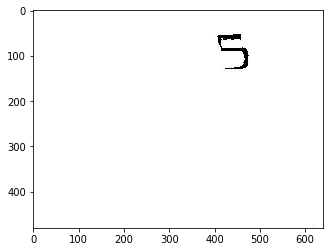

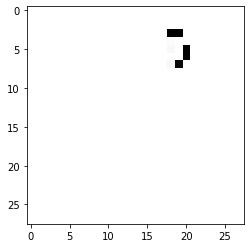

Probability Distribution for 0 1.2146071e-21
Probability Distribution for 1 6.1751014e-24
Probability Distribution for 2 2.4935812e-21
Probability Distribution for 3 3.1481064e-11
Probability Distribution for 4 1.5747342e-22
Probability Distribution for 5 1.0
Probability Distribution for 6 3.0902615e-19
Probability Distribution for 7 4.187796e-15
Probability Distribution for 8 2.2641455e-12
Probability Distribution for 9 1.5899016e-16
The Predicted Value is 5


In [0]:
from PIL import Image
user_test = filename
col = Image.open(user_test)
gray = col.convert('L')
bw = gray.point(lambda x: 0 if x<100 else 255, '1')
bw.save("bw_image.jpg")
bw
img_array = cv2.imread("bw_image.jpg", cv2.IMREAD_GRAYSCALE)
img_array = cv2.bitwise_not(img_array)
print(img_array.size)
plt.imshow(img_array, cmap = plt.cm.binary)
plt.show()
img_size = 28
new_array = cv2.resize(img_array, (img_size,img_size))
plt.imshow(new_array, cmap = plt.cm.binary)
plt.show()
user_test = tf.keras.utils.normalize(new_array, axis = 1)
predicted = model.predict([[user_test]])
a = predicted[0][0]
for i in range(0,10):
  b = predicted[0][i]
  print("Probability Distribution for",i,b)

print("The Predicted Value is",np.argmax(predicted[0]))